In [26]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image as Img
from PIL import ImageTk
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import os


In [27]:
# Mặc định threshold = [0.6, 0.7, 0.7]
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cpu')

In [28]:
import glob
import torch
from torchvision import transforms
from facenet_pytorch import InceptionResnetV1, fixed_image_standardization
import os
from PIL import Image
import numpy as np

In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [30]:
def trans(img):
    transform = transforms.Compose([
            transforms.ToTensor(),
            fixed_image_standardization
        ])
    return transform(img)

In [31]:
def fixed_image_standardization(image_tensor):
    processed_tensor = (image_tensor - 127.5) / 128.0
    return processed_tensor

In [32]:
model = InceptionResnetV1(
    classify=False,
    pretrained="casia-webface"
).to(device)

model.eval()

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [33]:
IMG_PATH = 'D:\WorkSpace\KhaiPhaDuLieu\classifier\dataset\clean_data_2'
# save_img_path =  '/content/drive/MyDrive/Facenet_khaiphadulieu/dataset/clean_data_2'
embeddings = []
names = []
# if not os.path.exists(new_directory_path):
#     # Tạo thư mục mới
#     os.makedirs(new_directory_path)
# else:
#   print('Loi tao thu muc')

for usr in os.listdir(IMG_PATH):
  embeds = []
  print(usr)

  for file in tqdm(glob.glob(os.path.join(IMG_PATH, usr)+'/*.jpg')):
      try:
          img = Image.open(file)

      except:
          continue

      with torch.no_grad():
          embed = model(trans(img).unsqueeze(0).to(device))
          embed_numpy = embed.detach().cpu().numpy()
          embeds.append(embed_numpy)
      # if(len(embeds)):
      #     break

  if len(embeds) == 0:
    continue

  embeds_np = np.vstack(embeds)
  # embedding = torch.cat(embeds).mean(0, keepdim=True) #dua ra trung binh cua cac tensor, kich thuoc [1,512]
  embeddings.append(embeds_np) # 1 cai list n cai [1,512]
  names.append(usr)

print(len(embeddings))
print(names)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\WorkSpace\\KhaiPhaDuLieu\\classifier\\dataset\\clean_data_2'

In [34]:
import joblib
def save_knn_model(knn_model, file_path):
    print('saving knn_model!!!')
    joblib.dump(knn_model, f'{file_path}/knn_model.pkl', compress=3)
def save_features(data, filepath):
    print('saving feature!!!')  
    joblib.dump(data, filepath)
    print('saved')
def load_features(file_path):
    print('loading file')
    print('loaded')
    return joblib.load(file_path)

In [ ]:
# save_features(embeddings,r'D:\WorkSpace\KhaiPhaDuLieu\classifier\dataset\face_embedding\face_embeddings.pkl' )

In [ ]:
#save_features(names,r'D:\WorkSpace\KhaiPhaDuLieu\classifier\dataset\face_embedding\names.pkl')

saving feature!!!
saved


In [35]:
embeddings = load_features(r'C:\Users\Admin\Documents\BETTEREVERYDAY\DataMining\2023_Project_DiemDanh\face_embedding\face_embeddings.pkl')

names = load_features(r'C:\Users\Admin\Documents\BETTEREVERYDAY\DataMining\2023_Project_DiemDanh\face_embedding\names.pkl')


loading file
loaded
loading file
loaded


In [36]:
print(names)

['CongLuong', 'CongSon', 'DatVan', 'KhanhDuong', 'KyNam', 'MongDo', 'NguyenBao', 'NhatPhuong', 'PhucDuy', 'QuangHuy', 'ThuThao', 'TienNhat', 'TuanAnh', 'VanTien585', 'VanTien591']


In [37]:
labels = []
for index, item in enumerate(embeddings):
  num_img, _ = item.shape
  labels.extend([names[index]] * num_img)
print(len(labels))

print(labels)

6734
['CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongLuong', 'CongL

In [38]:
train_data = np.vstack(tuple(embeddings))
print('data size: ',train_data.shape)

data size:  (6734, 512)


Accuracy: 0.8953229398663697


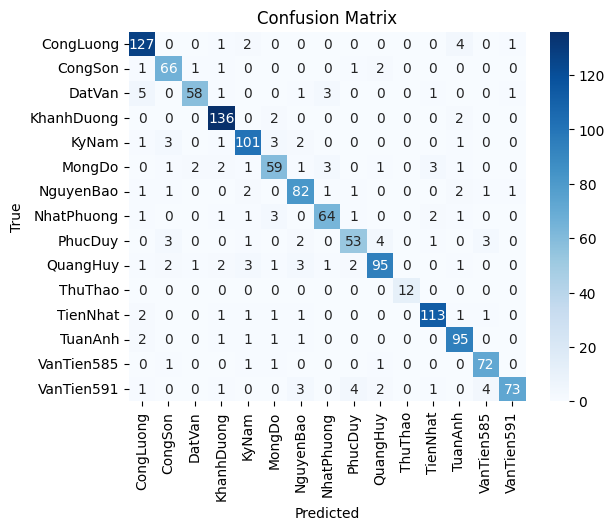

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Giả sử x_train và y_train là dữ liệu huấn luyện
# x_test và y_test là dữ liệu kiểm tra

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier() 
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn_model = GridSearchCV(knn, param_grid, cv=5)

# Huấn luyện mô hình
knn_model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(x_test)

# Đánh giá hiệu suất mô hình
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Hiển thị ma trận nhầm lẫn bằng biểu đồ heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names, yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
class_report = classification_report(y_test, y_pred, target_names=names)
print(class_report)

              precision    recall  f1-score   support

   CongLuong       0.89      0.94      0.92       135
     CongSon       0.86      0.92      0.89        72
      DatVan       0.94      0.83      0.88        70
  KhanhDuong       0.92      0.97      0.94       140
       KyNam       0.89      0.90      0.89       112
      MongDo       0.83      0.80      0.81        74
   NguyenBao       0.85      0.89      0.87        92
  NhatPhuong       0.89      0.86      0.88        74
     PhucDuy       0.85      0.79      0.82        67
    QuangHuy       0.90      0.85      0.88       112
     ThuThao       1.00      1.00      1.00        12
    TienNhat       0.93      0.93      0.93       121
     TuanAnh       0.88      0.94      0.91       101
  VanTien585       0.89      0.95      0.92        76
  VanTien591       0.96      0.82      0.88        89

    accuracy                           0.90      1347
   macro avg       0.90      0.89      0.90      1347
weighted avg       0.90   

In [40]:
v_cap.release()

In [42]:
#Khanh Duong OK
#Cong Son OK
# Mặc định threshold = [0.6, 0.7, 0.7]
# v_cap.release()
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cpu')

import cv2
from IPython.display import display, Image as IPImage
video_url = r'C:\Users\Admin\Documents\BETTEREVERYDAY\DataMining\2023_Project_DiemDanh\DatVan_v2.mp4'
v_cap = cv2.VideoCapture(video_url)

# v_cap = cv2.VideoCapture(0)


fps = v_cap.get(cv2.CAP_PROP_FPS)
index = 0
while True:
    try:
      success, frame = v_cap.read()

      frame_copy = frame.copy()
      index +=1
      if not success:
        break
      file_name = r'dataset\test_video/test.jpg'
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      frame = Image.fromarray(frame)
      mtcnn(frame, file_name)
      image = Image.open(file_name)
      # cv2.imshow('hello', image)
      embed = model(trans(image).unsqueeze(0).to(device))
      embed_numpy = embed.detach().cpu().numpy()
      label = knn_model.predict(embed_numpy)
      boxes, _ = mtcnn.detect(frame)
      # dict_labels 
      print(label)
      if index == 20:
        break
      label = str(label)
      for box in boxes:
        bbox = list(map(int,box.tolist()))
        print(bbox)
        frame_copy = cv2.rectangle(frame_copy, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,0,255), 6)
        frame_copy = cv2.putText(frame_copy, label , (bbox[0],bbox[1]), cv2.FONT_HERSHEY_DUPLEX, 2, (0,255,0), 2, cv2.LINE_8)
      cv2.imshow('resul1t', frame_copy)
      delay = int(1000 / fps) if fps > 0 else 1
      if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
    except Exception as e:
      cv2.imshow('result1', frame_copy)
      delay = int(1000 / fps) if fps > 0 else 1
      if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
      print(label)
v_cap.release()
cv2.destroyAllWindows()

['CongLuong']
[153, 154, 267, 309]
['CongLuong']
[152, 154, 267, 308]
['MongDo']
[149, 153, 266, 308]
['MongDo']
[149, 154, 265, 308]
['MongDo']
[151, 152, 267, 310]
['DatVan']
[149, 154, 263, 308]
[51, 323, 77, 354]
['DatVan']
[148, 152, 264, 310]
['DatVan']
[148, 152, 264, 311]
['DatVan']
[148, 152, 264, 311]
['CongLuong']
[146, 154, 262, 309]
['CongSon']
[147, 152, 264, 312]
['CongLuong']
[145, 155, 262, 309]
['CongLuong']
[148, 154, 261, 310]
[51, 322, 76, 352]
['DatVan']
[142, 155, 260, 310]
['CongLuong']
[147, 160, 258, 310]
['CongLuong']
[143, 156, 258, 311]
['DatVan']
[137, 155, 254, 310]
['DatVan']
[136, 156, 252, 311]
['DatVan']
[136, 156, 252, 311]
['DatVan']


In [ ]:
import cv2
from IPython.display import display, Image as IPImage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

power = pow(10, 6)
# video_url = r'D:\WorkSpace\KhaiPhaDuLieu\classifier\dataset\test_video\MongDo.mp4'
# v_cap = cv2.VideoCapture(video_url)

v_cap = cv2.VideoCapture(0)

fps = v_cap.get(cv2.CAP_PROP_FPS)
while True:
  success, frame = v_cap.read()
  if not success:
    break
  try:
    boxes, _ = mtcnn.detect(frame)
    for box in boxes:
        bbox = list(map(int,box.tolist()))
        frame = cv2.rectangle(frame, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,0,255), 6)
        score = torch.Tensor.cpu(score[0]).detach().numpy()*power
        frame = cv2.putText(frame, label + '_{:.2f}'.format(float(score)), (bbox[0],bbox[1]), cv2.FONT_HERSHEY_DUPLEX, 2, (0,255,0), 2, cv2.LINE_8)
    cv2.imshow('result', frame)
    delay = int(1000 / fps) if fps > 0 else 1
    if cv2.waitKey(delay) & 0xFF == ord('q'):
      break
  except Exception as e:
    cv2.imshow('result', frame)
    delay = int(1000 / fps) if fps > 0 else 1
    if cv2.waitKey(delay) & 0xFF == ord('q'):
      break

v_cap.release()
cv2.destroyAllWindows()

In [ ]:
# Tìm Hiểu
def extract_face(box, img, margin=20):
    face_size = 160
    img_size = img.shape[:2]
    margin = [
        margin * (box[2] - box[0]) / (face_size - margin),
        margin * (box[3] - box[1]) / (face_size - margin),
    ]

    box = [ #box[0] và box[1] là tọa độ của điểm góc trên cùng trái
        int(max(box[0] - margin[0] / 2, 0)), #nếu thêm vào margin bị ra khỏi rìa ảnh => đưa về điểm 0
        int(max(box[1] - margin[1] / 2, 0)),
        int(min(box[2] + margin[0] / 2, img_size[0])), #nếu thêm vào margin bị ra khỏi rìa ảnh => đưa về tọa độ của ảnh gốc
        int(min(box[3] + margin[1] / 2, img_size[1])),

    ] #tạo margin mới bao quanh box cũ
    img = img[box[1]:box[3], box[0]:box[2]]
    face = cv2.resize(img,(face_size, face_size), interpolation=cv2.INTER_AREA)
    face = Img.fromarray(face)
    return face


In [ ]:
def inference(model, face, local_embeds, power, threshold = 0.7):
    #local: [n,512] voi n la so nguoi trong faceslist
    embeds = []
    embed = model(trans(face).unsqueeze(0).to(device))
    embeds.append(embed.unsqueeze(0))
    detect_embeds = torch.cat(embeds)
    norm_diff = torch.transpose(detect_embeds, 1, 2) - torch.transpose(local_embeds, 0, 1).unsqueeze(0)
    norm_score = torch.sum(torch.pow(norm_diff, 2), dim=1) #(1,n), moi cot la tong khoang cach euclide so vs embed moi
    min_dist, embed_idx = torch.min(norm_score, dim = 1)
    print(embed_idx)
    print(min_dist*power, names[embed_idx])
    if min_dist*power > threshold:
        return -1, -1
    else:
        return embed_idx, min_dist.double()

In [ ]:
v_cap = cv2.VideoCapture(0)
v_cap.release()

In [ ]:
import cv2
from IPython.display import display, Image as IPImage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

power = pow(10, 6)
# video_url = r'D:\WorkSpace\KhaiPhaDuLieu\classifier\dataset\test_video\MongDo.mp4'
# v_cap = cv2.VideoCapture(video_url)

v_cap = cv2.VideoCapture(0)

fps = v_cap.get(cv2.CAP_PROP_FPS)
while True:
  success, frame = v_cap.read()
  if not success:
    break
  try:
    boxes, _ = mtcnn.detect(frame)
    for box in boxes:
      bbox = list(map(int,box.tolist()))
      face = extract_face(bbox, frame)
      idx, score = inference(model, face, embeddings, power)
      if idx != -1:
          frame = cv2.rectangle(frame, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,0,255), 6)
          score = torch.Tensor.cpu(score[0]).detach().numpy()*power
          frame = cv2.putText(frame, names[idx] + '_{:.2f}'.format(float(score)), (bbox[0],bbox[1]), cv2.FONT_HERSHEY_DUPLEX, 2, (0,255,0), 2, cv2.LINE_8)
      else:
          frame = cv2.rectangle(frame, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,0,255), 6)
          frame = cv2.putText(frame,'Unknown', (bbox[0],bbox[1]), cv2.FONT_HERSHEY_DUPLEX, 2, (0,255,0), 2, cv2.LINE_8)
    cv2.imshow('result', frame)
    delay = int(1000 / fps) if fps > 0 else 1
    if cv2.waitKey(delay) & 0xFF == ord('q'):
      break
  except Exception as e:
    cv2.imshow('result', frame)
    delay = int(1000 / fps) if fps > 0 else 1
    if cv2.waitKey(delay) & 0xFF == ord('q'):
      break

v_cap.release()
cv2.destroyAllWindows()

tensor([13])
tensor([0.3341], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.5232], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.0405], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.1905], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.2283], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.2255], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.1987], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.1806], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.0741], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.0500], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.0990], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.0320], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.0669], grad_fn=<MulBackward0>) CongLuong
tensor([13])
tensor([0.2432], grad_fn=<MulBackward0>) CongLuong
tensor([3])
tensor([0.0911], grad_fn=<MulBackward0>) MongDo
tensor([13])
tensor([0.0304], grad_fn=<MulBa